In [1]:
from wordle_sim import simulate
import pandas as pd
import numpy as np

In [2]:
def apply_simulation(row):
    return np.asarray(simulate(), dtype=object)

In [3]:
num_simulations = 500
simulations = pd.DataFrame(index=range(num_simulations))
simulations['num_sim'] = range(num_simulations)
simulations[['correct_word', 'guesses', 'round', 'won', 'letterbanks', 'keyboards']] = (
    simulations['num_sim'].apply(apply_simulation).to_list()
)

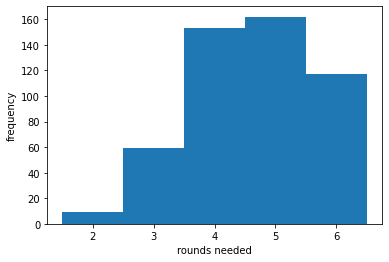

In [4]:
import matplotlib.pyplot as plt
plt.hist(simulations['round'], bins=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
plt.xlabel('rounds needed')
plt.ylabel('frequency')
plt.show()

In [5]:
simulations.groupby('round').agg(count=('num_sim', 'count'))

,count
round,
2,9
3,59
4,153
5,162
6,117


In [6]:
simulations.groupby('won').agg(count=('num_sim', 'count'))

,count
won,
False,50
True,450


In [7]:
user_input_simulation = simulate('angus', 'trump')

In [8]:
user_input_simulation

('angus',
 ['trump', 'guasa', 'angus'],
 3,
 True,
 [[['a',
    'b',
    'c',
    'd',
    'e',
    'f',
    'g',
    'h',
    'i',
    'j',
    'k',
    'l',
    'm',
    'n',
    'o',
    'p',
    'q',
    'r',
    's',
    't',
    'u',
    'v',
    'w',
    'x',
    'y',
    'z'],
   ['a',
    'b',
    'c',
    'd',
    'e',
    'f',
    'g',
    'h',
    'i',
    'j',
    'k',
    'l',
    'm',
    'n',
    'o',
    'p',
    'q',
    'r',
    's',
    't',
    'u',
    'v',
    'w',
    'x',
    'y',
    'z'],
   ['a',
    'b',
    'c',
    'd',
    'e',
    'f',
    'g',
    'h',
    'i',
    'j',
    'k',
    'l',
    'm',
    'n',
    'o',
    'p',
    'q',
    'r',
    's',
    't',
    'u',
    'v',
    'w',
    'x',
    'y',
    'z'],
   ['a',
    'b',
    'c',
    'd',
    'e',
    'f',
    'g',
    'h',
    'i',
    'j',
    'k',
    'l',
    'm',
    'n',
    'o',
    'p',
    'q',
    'r',
    's',
    't',
    'u',
    'v',
    'w',
    'x',
    'y',
    'z'],
   ['a',


In [9]:
def get_letters_per_round(letterbanks):
    letters_per_round = {}
    round_ = 1 
    for letterbank in letterbanks:
        set_for_round = set()
        lengths = 0
        for position, letters_for_position in enumerate(letterbank):
            letters_per_round[f'letter_{position}_round_{round_}'] = len(letters_for_position)
            set_for_round.update(set(letters_for_position))
            lengths += len(letters_for_position)
        letters_per_round[f'avg_round_{round_}'] = lengths/5
        letters_per_round[f'set_round_{round_}'] = set_for_round
        letters_per_round[f'set_length_round_{round_}'] = len(set_for_round)
        round_ += 1
    return letters_per_round

In [10]:
letters_per_round = simulations['letterbanks'].apply(get_letters_per_round).apply(pd.Series).fillna(0)
letters_per_round.columns = (
    letters_per_round.columns.map(lambda str_: tuple(str_.split('_round_')))
                     .set_names(['metric', 'round'])
)

In [11]:
metrics = (
    pd.DataFrame(letters_per_round.mean(numeric_only=True))
    .reset_index('metric')
    .pivot(columns='metric', values=0)
)

In [12]:
metrics

metric,avg,letter_0,letter_1,letter_2,letter_3,letter_4,set_length
round,,,,,,,
1,26.0000,26.000,26.000,26.000,26.000,26.000,26.000
2,20.6032,21.496,19.734,20.556,20.584,20.646,22.574
3,15.3380,16.534,14.092,15.732,15.018,15.314,19.746
4,9.2500,10.502,7.766,9.674,9.142,9.166,16.118
5,4.2912,5.806,3.004,4.436,4.250,3.960,10.402
6,1.5288,2.388,1.106,1.494,1.312,1.344,4.852
7,0.5596,0.936,0.366,0.594,0.486,0.416,1.942


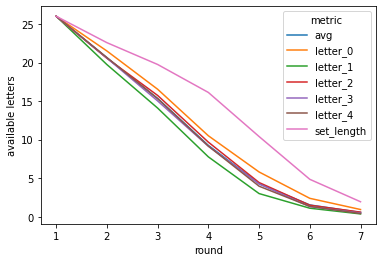

In [13]:
metrics.plot(ylabel='available letters')
plt.show()